In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Define directories for train, test, and validation datasets
train_dir = '/content/drive/MyDrive/ML Pneumonia/train'
test_dir = '/content/drive/MyDrive/ML Pneumonia/test'
val_dir = '/content/drive/MyDrive/ML Pneumonia/val'

In [5]:
# Define image dimensions and batch size
img_height, img_width = 150, 150
batch_size = 32

In [6]:
# Create image data generators with data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.


In [9]:
validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 16 images belonging to 2 classes.


In [11]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_height, img_width, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
print("Number of batches in the training generator:", len(train_generator))
print("Filenames in the first batch:", train_generator.filenames[:batch_size])

Number of batches in the training generator: 163
Filenames in the first batch: ['NORMAL/IM-0115-0001.jpeg', 'NORMAL/IM-0117-0001.jpeg', 'NORMAL/IM-0119-0001.jpeg', 'NORMAL/IM-0122-0001.jpeg', 'NORMAL/IM-0125-0001.jpeg', 'NORMAL/IM-0127-0001.jpeg', 'NORMAL/IM-0128-0001.jpeg', 'NORMAL/IM-0129-0001.jpeg', 'NORMAL/IM-0131-0001.jpeg', 'NORMAL/IM-0133-0001.jpeg', 'NORMAL/IM-0135-0001.jpeg', 'NORMAL/IM-0137-0001.jpeg', 'NORMAL/IM-0140-0001.jpeg', 'NORMAL/IM-0141-0001.jpeg', 'NORMAL/IM-0143-0001.jpeg', 'NORMAL/IM-0145-0001.jpeg', 'NORMAL/IM-0147-0001.jpeg', 'NORMAL/IM-0149-0001.jpeg', 'NORMAL/IM-0151-0001.jpeg', 'NORMAL/IM-0152-0001.jpeg', 'NORMAL/IM-0154-0001.jpeg', 'NORMAL/IM-0156-0001.jpeg', 'NORMAL/IM-0158-0001.jpeg', 'NORMAL/IM-0160-0001.jpeg', 'NORMAL/IM-0162-0001.jpeg', 'NORMAL/IM-0164-0001.jpeg', 'NORMAL/IM-0166-0001.jpeg', 'NORMAL/IM-0168-0001.jpeg', 'NORMAL/IM-0170-0001.jpeg', 'NORMAL/IM-0172-0001.jpeg', 'NORMAL/IM-0176-0001.jpeg', 'NORMAL/IM-0177-0001.jpeg']


In [14]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=8,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/8
163/163 [==============================] - 157s 572ms/step - loss: 0.3680 - accuracy: 0.8401 - val_loss: 0.3737 - val_accuracy: 0.8750
Epoch 2/8
163/163 [==============================] - 89s 549ms/step - loss: 0.1996 - accuracy: 0.9204 - val_loss: 0.5709 - val_accuracy: 0.7500
Epoch 3/8
163/163 [==============================] - 88s 542ms/step - loss: 0.1806 - accuracy: 0.9279 - val_loss: 0.8185 - val_accuracy: 0.6250
Epoch 4/8
163/163 [==============================] - 88s 539ms/step - loss: 0.1704 - accuracy: 0.9306 - val_loss: 0.3380 - val_accuracy: 0.8125
Epoch 5/8
163/163 [==============================] - 88s 540ms/step - loss: 0.1829 - accuracy: 0.9270 - val_loss: 0.3266 - val_accuracy: 0.8750
Epoch 6/8
163/163 [==============================] - 90s 553ms/step - loss: 0.1638 - accuracy: 0.9331 - val_loss: 0.3190 - val_accuracy: 0.8750
Epoch 7/8
163/163 [==============================] - 89s 548ms/step - loss: 0.1447 - accuracy: 0.9408 - val_loss: 1.6536 - val_accuracy

In [15]:
# Evaluate the model on the test set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [16]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

20/20 [==============================] - 68s 4s/step - loss: 0.3741 - accuracy: 0.8798
Test accuracy: 0.879807710647583


In [17]:
# Plot training history
import matplotlib.pyplot as plt

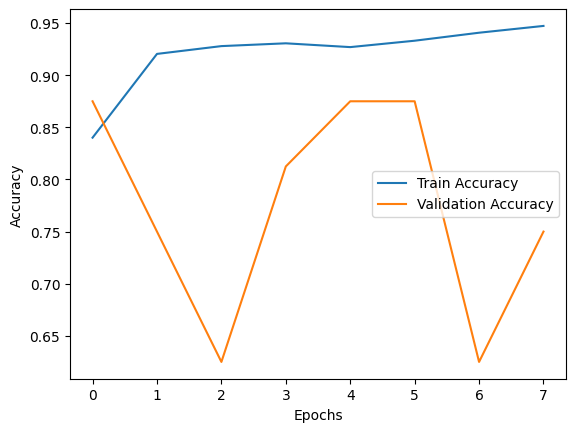

In [18]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()